In [59]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing 
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import missingno
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy.stats import uniform, randint
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [93]:
data.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

In [94]:
data.kurt().sort_values(ascending=False)

MiscVal          701.003342
PoolArea         223.268499
LotArea          203.243271
3SsnPorch        123.662379
LowQualFinSF      83.234817
KitchenAbvGr      21.532404
BsmtFinSF2        20.113338
ScreenPorch       18.439068
LotFrontage       17.452867
BsmtHalfBath      16.396642
TotalBsmtSF       13.250483
BsmtFinSF1        11.118236
EnclosedPorch     10.430766
MasVnrArea        10.082417
OpenPorchSF        8.490336
SalePrice          6.536282
1stFlrSF           5.745841
GrLivArea          4.895121
WoodDeckSF         2.992951
BedroomAbvGr       2.230875
MSSubClass         1.580188
OverallCond        1.106413
GarageArea         0.917067
TotRmsAbvGrd       0.880762
BsmtUnfSF          0.474994
GarageCars         0.220998
OverallQual        0.096293
Fireplaces        -0.217237
MoSold            -0.404109
GarageYrBlt       -0.418341
YearBuilt         -0.439552
2ndFlrSF          -0.553464
BsmtFullBath      -0.839098
FullBath          -0.857043
HalfBath          -1.076927
YrSold            -1

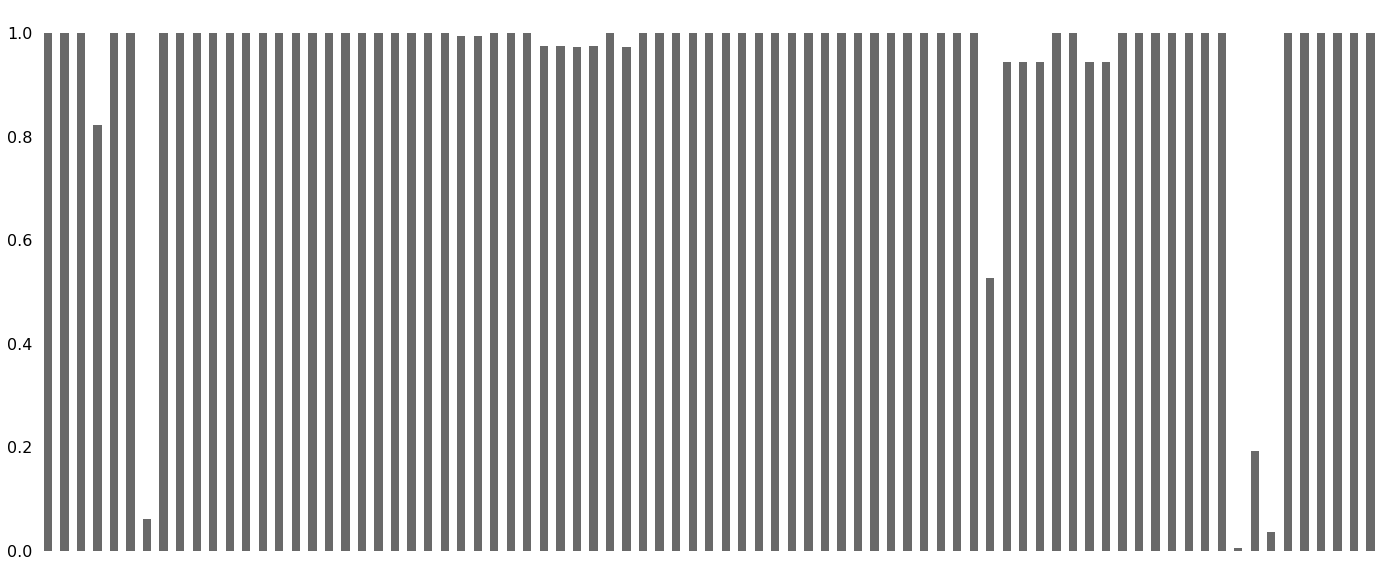

In [95]:
missingno.bar(data)

In [96]:
## Percentage of missing values
missingVals = data.isnull().mean() * 100
missingVals.sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [97]:
# Drop 0 variance cols: Id
# and features with a lot of missing values 
data.drop(columns=['Alley','Fence','PoolQC','MiscFeature','FireplaceQu','Id'], inplace=True)

In [98]:
#data.dropna(how='any', inplace=True)
y = data['SalePrice']
data.drop(columns = ['SalePrice'], inplace= True)

In [101]:
y.shape

(1460,)

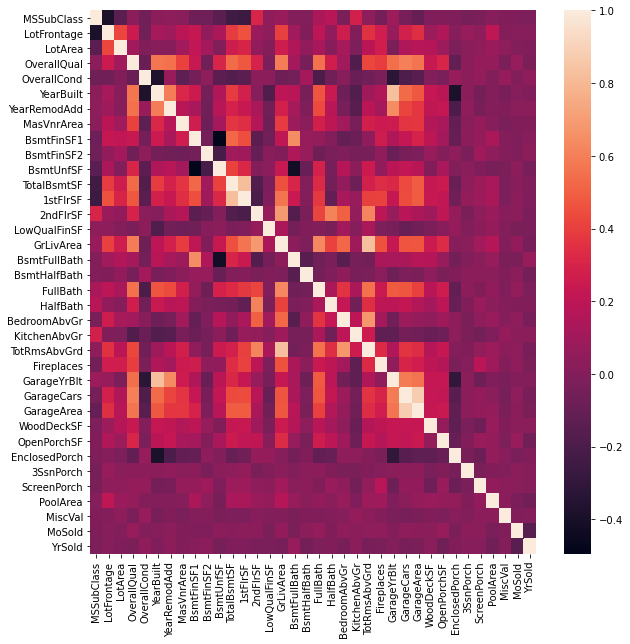

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

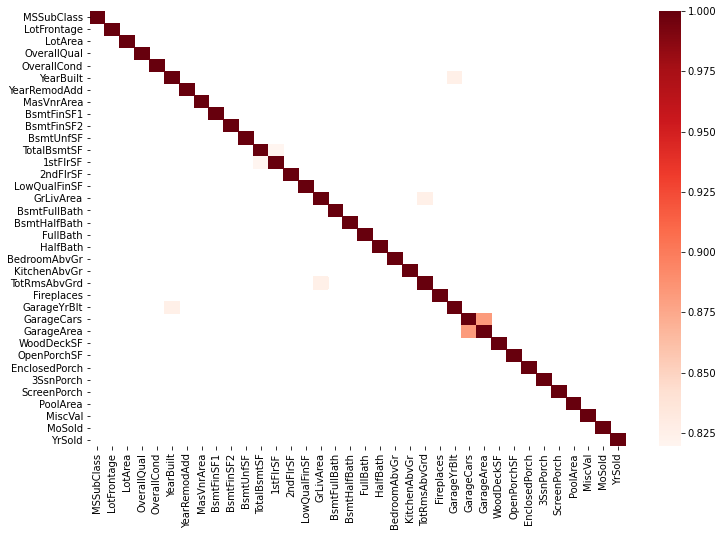

In [100]:
corr = data.corr()
kot = corr[np.abs(corr)>=0.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [105]:
## Drop correlated features
data.drop(columns=['GarageArea','GrLivArea','GarageYrBlt'], inplace=True)

In [106]:
def get_num_cat_features(type_features, data):
    return data.select_dtypes(include=type_features)

## Get the numerical features
numerics = ['int64','float64']
newdf_num = get_num_cat_features(numerics, data)

## Get the categorical features
newdf_cat = data.select_dtypes(['object'])


In [107]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

## Get the categorical features
test.drop(columns=['Id','Alley','Fence','PoolQC','MiscFeature','FireplaceQu'], inplace= True)
test.drop(columns=['GarageArea','GrLivArea','GarageYrBlt'], inplace=True)
test.fillna(test.mean())
#test.dropna(inplace= True)

## Get the numerical features
numericstest = ['int64','float64']
newdf_numtest = get_num_cat_features(numerics, test)

test_num = get_num_cat_features(numerics, test)

newdf_cattest = test.select_dtypes(['object'])

trainTest = newdf_cat.append(newdf_cattest)

In [108]:
newdf_num.shape

(1460, 33)

In [109]:
## First test of encoding labels:
def encode_labels(data):
    encoded_categoric_train_set = data.copy()
    
    for c in data.columns:
        data[c]= data[c].astype('category')
        encoded_categoric_train_set[c] = data[c].cat.codes
    return encoded_categoric_train_set

encoded_categoric_train_set = encode_labels(trainTest)

newdf_cat = encoded_categoric_train_set[:1460]
test = encoded_categoric_train_set[1460:] # 1094


In [110]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_numeric_train_set = scaler.fit_transform(newdf_num)

In [111]:
encoded_categoric_train_set = newdf_cat # or 1094

In [112]:
#y = np.log(y)

In [118]:
numeric_train_set_df.shape

(1460, 33)

In [113]:
numeric_train_set_df = pd.DataFrame(scaled_numeric_train_set, columns=newdf_num.columns)

# fill numeric nan
import numpy as np
from sklearn.impute import SimpleImputer
numCols = numeric_train_set_df.columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
numeric_train_set_df = imp.fit_transform(numeric_train_set_df)
numeric_train_set_df = pd.DataFrame(numeric_train_set_df, columns=numCols)
# fill categoric nan
catCols = encoded_categoric_train_set.columns
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
encoded_categoric_train_set= imp.fit_transform(encoded_categoric_train_set)

## Merge numercial and catgorical data
encoded_categoric_train_set = pd.DataFrame(encoded_categoric_train_set, columns=catCols)
train_set = pd.DataFrame(pd.merge(numeric_train_set_df,
                 encoded_categoric_train_set[encoded_categoric_train_set.columns], on= numeric_train_set_df.index))
train_set= train_set.drop(columns=['key_0'])
X = train_set

In [114]:
X.shape

(1460, 71)

In [115]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [116]:
#scaler2 = sklearn.preprocessing.StandardScaler()
#y = scaler2.fit_transform(y)

In [119]:


xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "importance_type": ['weight', 'gain', 'cover'],
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4),
    "num_parallel_tree" :  randint(1, 5),
    "reg_lambda":  randint(0, 5),
    "reg_alpha":  randint(0, 5),
    
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.7min finished


Model with rank: 1
Mean validation score: 0.890 (std: 0.022)
Parameters: {'colsample_bytree': 0.7948468314930252, 'gamma': 0.2536174043441962, 'importance_type': 'gain', 'learning_rate': 0.23646235975997862, 'max_depth': 5, 'n_estimators': 149, 'num_parallel_tree': 4, 'reg_alpha': 2, 'reg_lambda': 2, 'subsample': 0.6069519160741919}



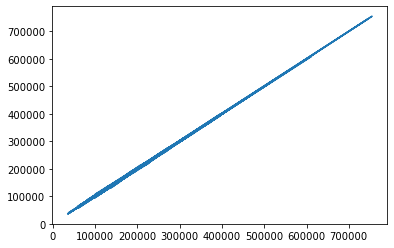

In [120]:
plt.plot(y,y_pred)

In [121]:
#encoded_categoric_test_set_trs =  categoric_test_set.apply(enc.transform) 
encoded_categoric_test_set = test


scaled_numeric_test_set = scaler.transform(test_num[newdf_num.columns])

numeric_test_set_df = pd.DataFrame(scaled_numeric_test_set, columns=newdf_num.columns)
## Merge numercial and catgorical data
test_set = pd.DataFrame(pd.merge(numeric_test_set_df,
                 test[test.columns], on= numeric_test_set_df.index))
test_set.drop(columns=['key_0'], inplace=True)
test_set.fillna(test_set.mean(), inplace=True)
Xtest = test_set[train_set.columns]


In [122]:
Xtest = test_set[X.columns]

In [123]:
y_predict = search.predict(Xtest)

In [124]:
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

output = pd.DataFrame({'Id': sample_submission.Id,
'SalePrice': y_predict})
output.to_csv('submissionXGBbestFILLNan.csv', index=False)